In [23]:
import pandas as pd
from prophet.plot import plot_plotly, plot_components_plotly
import plotly.io as pio
pio.renderers.default = "notebook_connected"  # ensures plots show in Jupyter
from prophet import Prophet
import plotly.graph_objects as go
from prophet.plot import plot_plotly, plot_components_plotly




In [24]:
# Install Plotly
!pip install plotly


In [25]:
df = pd.read_csv("Uber_Customer_Support_Tickets_Prepared.csv")
print("Dataset loaded! Shape:", df.shape)
df.head()

Dataset loaded! Shape: (999, 15)


,Ticket_ID,Created_At,Channel,Response_Time_Minutes,Resolution_Time_Minutes,CSAT_Score,Issue_Type,Day,Month,Weekday,Daily_Ticket_Count,Channel_Code,Issue_Code,Resolution_Category,CSAT_Binary
0,T0001,21-02-2025,Live Agent,4,175,3,Ride Cancellation,21,2,Friday,13,1,5,Slow,0
1,T0002,15-01-2025,Live Agent,7,15,4,Lost Item,15,1,Wednesday,11,1,3,Fast,1
2,T0003,13-03-2025,Live Agent,8,162,4,Account Access,13,3,Thursday,9,1,0,Slow,1
3,T0004,02-03-2025,Live Agent,17,154,2,Lost Item,2,3,Sunday,12,1,3,Slow,0
4,T0005,21-01-2025,Chatbot,5,70,5,Lost Item,21,1,Tuesday,11,0,3,Slow,1


In [26]:
# Step 3: Prepare data for Prophet
# -----------------------------
df_prophet = df[['Created_At', 'Daily_Ticket_Count']].rename(columns={'Created_At':'ds', 'Daily_Ticket_Count':'y'})
df_prophet['ds'] = pd.to_datetime(df_prophet['ds'], dayfirst=True)


In [27]:
# Step 4: Train Prophet model
# -----------------------------
model = Prophet(daily_seasonality=True, yearly_seasonality=False, weekly_seasonality=True)
model.fit(df_prophet)
print("Prophet model trained!")


21:23:36 - cmdstanpy - INFO - Chain [1] start processing
21:23:36 - cmdstanpy - INFO - Chain [1] done processing


Prophet model trained!


In [28]:
# Step 5: Forecast next 30 days
# -----------------------------
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

In [31]:
from prophet.plot import plot_plotly, plot_components_plotly
import matplotlib.pyplot as plt

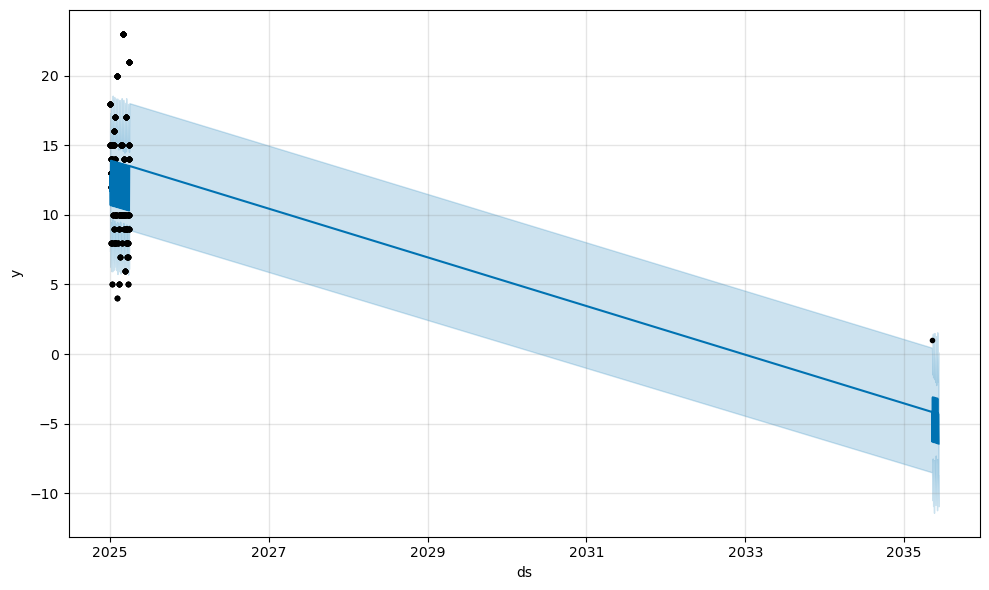

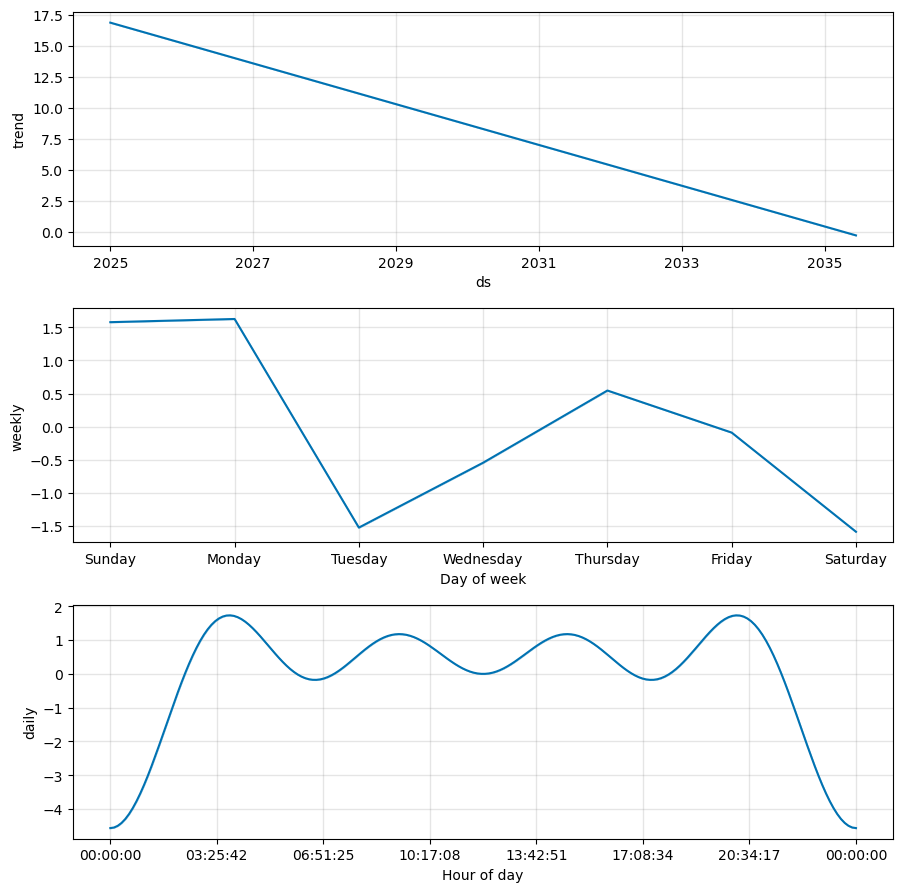

In [32]:
fig1 = model.plot(forecast)
plt.show()

# Components plot
fig2 = model.plot_components(forecast)
plt.show()

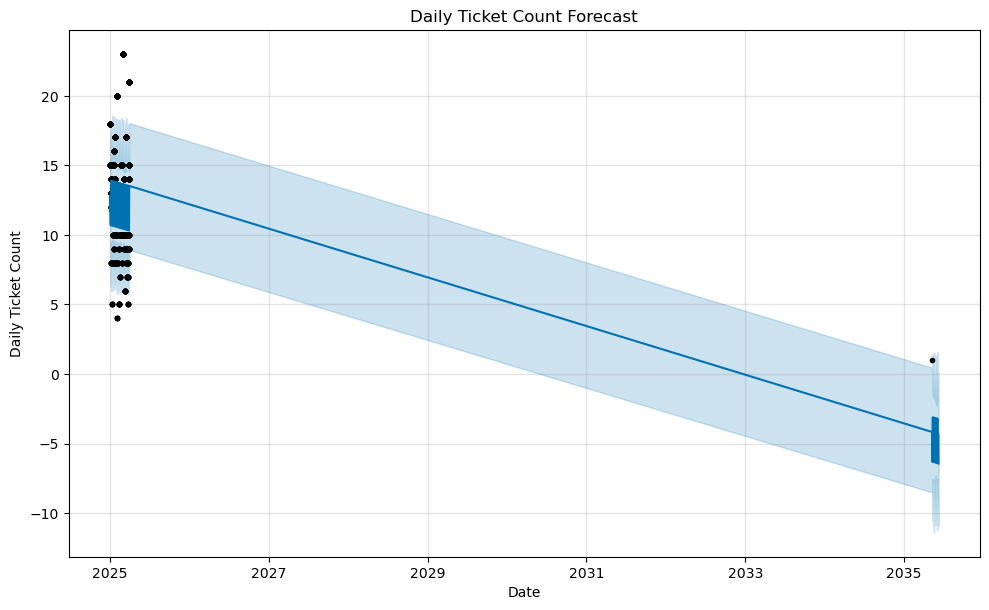

In [33]:
# Step 6: Plot forecast (Matplotlib)
# -----------------------------
fig1 = model.plot(forecast)
plt.title("Daily Ticket Count Forecast")
plt.xlabel("Date")
plt.ylabel("Daily Ticket Count")
plt.show()

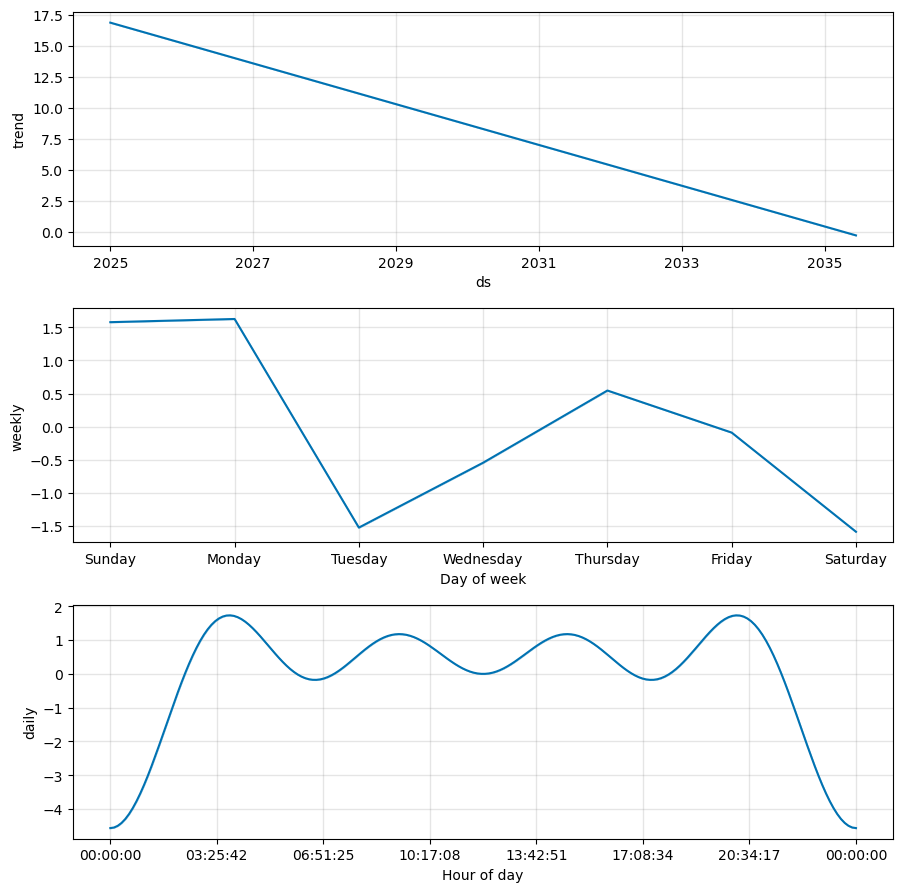

In [34]:
# Step 7: Plot trend & seasonality components (Matplotlib)
# -----------------------------
fig2 = model.plot_components(forecast)
plt.show()


In [35]:
# Step 8: Detect anomalies
# -----------------------------
df_prophet = df_prophet.merge(forecast[['ds','yhat','yhat_lower','yhat_upper']], on='ds')
df_prophet['anomaly'] = ((df_prophet['y'] > df_prophet['yhat_upper']) | 
                         (df_prophet['y'] < df_prophet['yhat_lower']))


In [36]:
# Show anomalies
anomalies = df_prophet[df_prophet['anomaly']]
print(f"Detected {len(anomalies)} anomalies:")
anomalies[['ds','y','yhat','yhat_lower','yhat_upper']]

Detected 193 anomalies:


,ds,y,yhat,yhat_lower,yhat_upper
5,2025-03-24,5,13.547822,9.087847,17.969781
10,2025-01-24,17,12.095735,7.534775,16.290028
22,2025-02-02,20,13.724568,9.462783,18.207221
23,2025-03-17,9,13.579290,9.310182,17.964234
33,2025-03-03,23,13.642228,9.412251,18.261872
...,...,...,...,...,...
978,2025-01-24,17,12.095735,7.534775,16.290028
983,2025-03-03,23,13.642228,9.412251,18.261872
990,2025-03-17,9,13.579290,9.310182,17.964234
992,2025-01-01,18,11.743959,7.377128,15.997435
